# How the price of energy is affected by consumption

# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Import electricity and gas price data

source: 
[Department for Energy Security and Net Zero and Department for Business, Energy & Industrial Strategy](https://www.gov.uk/government/statistical-data-sets/gas-and-electricity-prices-in-the-non-domestic-sector)

* This data includes the CCL (climate change levy)
* It does not include VAT (vat can be claimed back for vat registered businesses)

In [2]:
# import the data obtained for the gov.uk website
egprices = pd.read_excel('./Data/gas and elec non domestic prices.xlsx')

In [3]:
egprices.head()

,Year,Quarter,Electricity: Very Small (Pence per kWh),Electricity: Small (Pence per kWh),Electricity: Small/Medium (Pence per kWh),Electricity: Medium (Pence per kWh),Electricity: Large (Pence per kWh),Electricity: Very Large (Pence per kWh),Electricity: Extra Large (Pence per kWh),Electricity: Average (Pence per kWh),Gas: Very Small (Pence per kWh),Gas: Small (Pence per kWh),Gas: Medium (Pence per kWh),Gas: Large (Pence per kWh),Gas: Very Large (Pence per kWh),Gas: Average (Pence per kWh)
0,2004,1st,6.041900,5.491762,4.139750,3.639109,3.376946,2.975759,NaN,4.015,1.613505,1.406366,1.163652,1.040894,0.877579,1.251000
1,2004,2nd,6.128515,5.310131,4.213574,3.653105,3.297979,2.858516,NaN,3.887,1.466271,1.304053,1.262996,1.034469,1.087342,1.225000
2,2004,3rd,6.392726,4.763896,3.928002,3.732960,3.676800,3.113938,NaN,3.946,1.688511,1.513226,1.214925,0.906780,0.984872,1.209000
3,2004,4th,6.442553,5.724362,4.898325,4.282188,4.186195,3.814257,NaN,4.742,1.485573,1.394492,1.339390,1.200072,1.036643,1.305574
4,2005,1st,6.610770,5.930425,5.273539,4.563788,4.303348,3.841138,NaN,4.845,1.834352,1.725252,1.596385,1.437451,1.287418,1.580000


In [4]:
# remove the number ordinals from the quarter column
egprices['Quarter'] = egprices['Quarter'].str.replace(r'(st|nd|rd|th)', '', regex=True)

# convert the year and quarter columns into one period object
egprices['period'] = pd.to_datetime(egprices['Year'].astype(str) + 'Q' + egprices['Quarter'].astype(str)).dt.to_period('Q')

# Convert the period object to a datetime object
egprices['period'] = egprices['period'].dt.to_timestamp()

In [5]:
# create two new dataframes for electricity and gas to make things easier
eprice = egprices[['period', 
                  'Electricity: Very Small (Pence per kWh)', 
                  'Electricity: Small (Pence per kWh)', 
                  'Electricity: Small/Medium (Pence per kWh)', 
                  'Electricity: Medium (Pence per kWh)',
                  'Electricity: Large (Pence per kWh)',
                  'Electricity: Very Large (Pence per kWh)',
                  'Electricity: Extra Large (Pence per kWh)',
                  'Electricity: Average (Pence per kWh)'
                 ]].copy()   

gprice = egprices[['period', 
                  'Gas: Very Small (Pence per kWh)', 
                  'Gas: Small (Pence per kWh)', 
                  'Gas: Medium (Pence per kWh)',
                  'Gas: Large (Pence per kWh)',
                  'Gas: Very Large (Pence per kWh)',
                  'Gas: Average (Pence per kWh)'
                 ]].copy()   

In [6]:
eprice.head()

,period,Electricity: Very Small (Pence per kWh),Electricity: Small (Pence per kWh),Electricity: Small/Medium (Pence per kWh),Electricity: Medium (Pence per kWh),Electricity: Large (Pence per kWh),Electricity: Very Large (Pence per kWh),Electricity: Extra Large (Pence per kWh),Electricity: Average (Pence per kWh)
0,2004-01-01,6.041900,5.491762,4.139750,3.639109,3.376946,2.975759,NaN,4.015
1,2004-04-01,6.128515,5.310131,4.213574,3.653105,3.297979,2.858516,NaN,3.887
2,2004-07-01,6.392726,4.763896,3.928002,3.732960,3.676800,3.113938,NaN,3.946
3,2004-10-01,6.442553,5.724362,4.898325,4.282188,4.186195,3.814257,NaN,4.742
4,2005-01-01,6.610770,5.930425,5.273539,4.563788,4.303348,3.841138,NaN,4.845


In [7]:
gprice.head()

,period,Gas: Very Small (Pence per kWh),Gas: Small (Pence per kWh),Gas: Medium (Pence per kWh),Gas: Large (Pence per kWh),Gas: Very Large (Pence per kWh),Gas: Average (Pence per kWh)
0,2004-01-01,1.613505,1.406366,1.163652,1.040894,0.877579,1.251000
1,2004-04-01,1.466271,1.304053,1.262996,1.034469,1.087342,1.225000
2,2004-07-01,1.688511,1.513226,1.214925,0.906780,0.984872,1.209000
3,2004-10-01,1.485573,1.394492,1.339390,1.200072,1.036643,1.305574
4,2005-01-01,1.834352,1.725252,1.596385,1.437451,1.287418,1.580000


# Plot data raw data

## Electricity prices

First plot the energy prices for different consumption bands

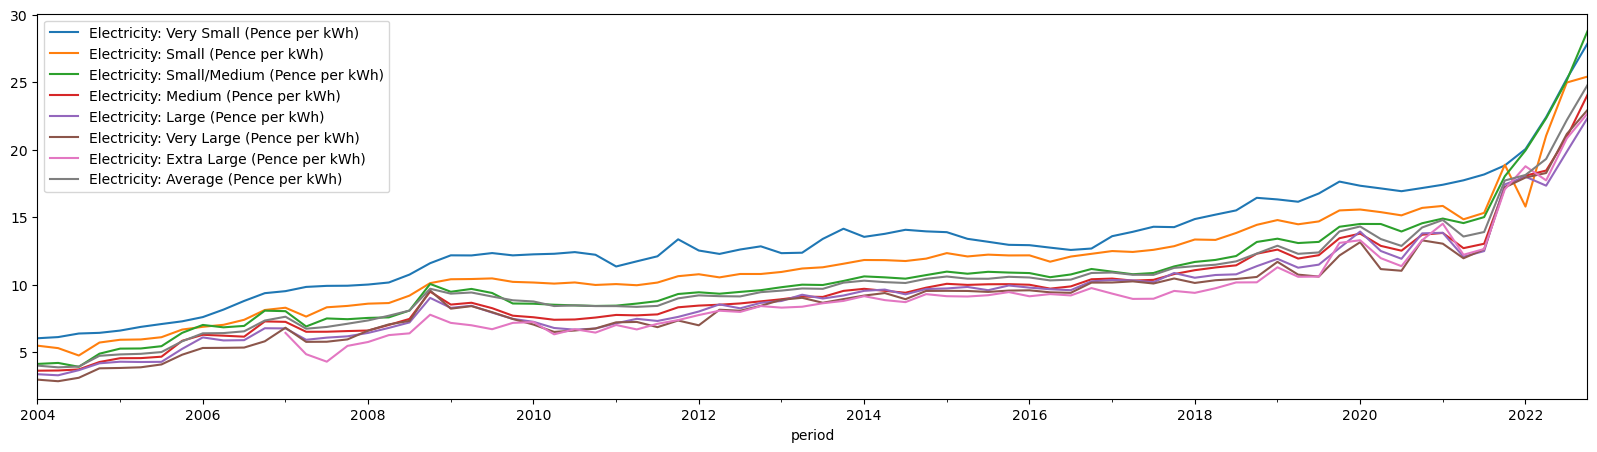

In [8]:
eprice.plot(x='period', figsize=(20, 5))
plt.show()

## Gas Prices

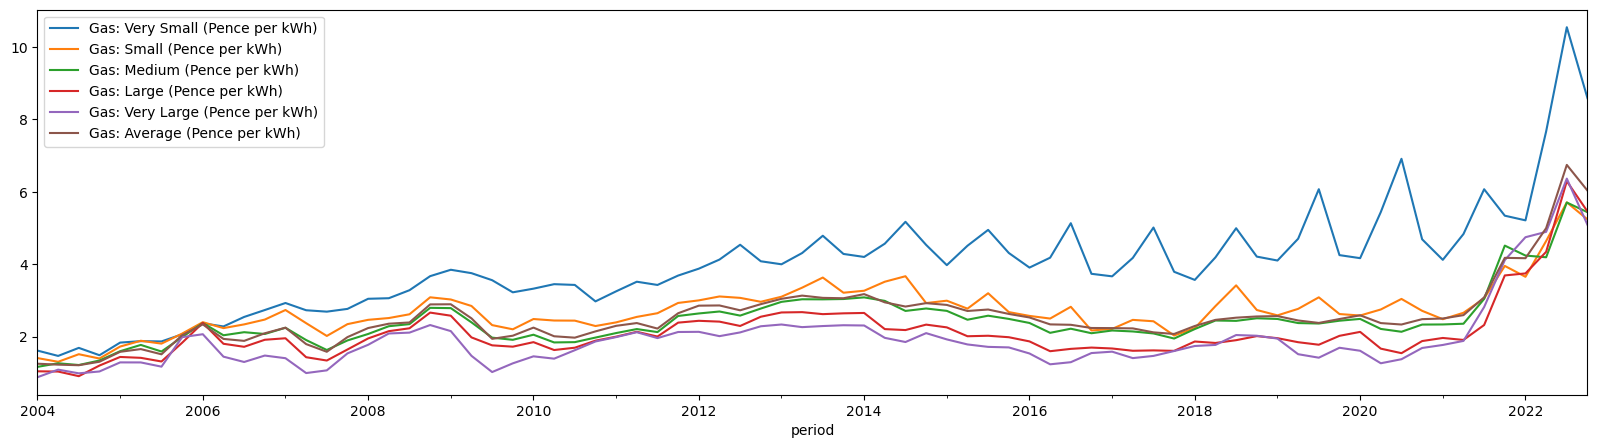

In [9]:
gprice.plot(x='period', figsize=(20, 5))
plt.show()

# Investigate difference in price between the different consumption bands

## Electricity - price difference depending on consumption band

In [10]:
# create a new column in the dataframe which is the difference between the largest and smallest consumers costs.
eprice['elec difference'] = eprice['Electricity: Very Small (Pence per kWh)'] - eprice['Electricity: Extra Large (Pence per kWh)']

# create a new column to calculate the percentage difference
eprice['elec percentage difference'] = (eprice['elec difference'] / eprice['Electricity: Extra Large (Pence per kWh)']) * 100

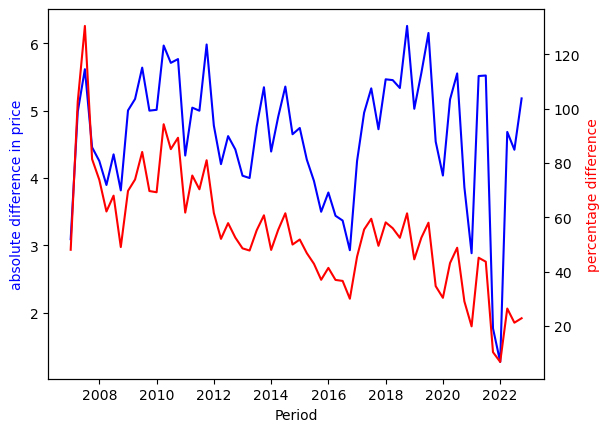

In [11]:
# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the first series of data on the first y-axis
ax1.plot(eprice['period'], eprice['elec difference'], 'b-')
ax1.set_xlabel('Period')
ax1.set_ylabel('absolute difference in price', color='b')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(eprice['period'], eprice['elec percentage difference'], 'r-')
ax2.set_ylabel('percentage difference', color='r')

plt.show()

### I now want to create a plot showing these differences between all the different energy groups to the average price

In [12]:
# create lists of the column names without period or averages for computing the difference from the mean.

e_column_list = ['Electricity: Very Small (Pence per kWh)', 
                'Electricity: Small (Pence per kWh)', 
                'Electricity: Small/Medium (Pence per kWh)', 
                'Electricity: Medium (Pence per kWh)',
                'Electricity: Large (Pence per kWh)',
                'Electricity: Very Large (Pence per kWh)',
                'Electricity: Extra Large (Pence per kWh)' 
]


In [13]:
eprice.head(1)

,period,Electricity: Very Small (Pence per kWh),Electricity: Small (Pence per kWh),Electricity: Small/Medium (Pence per kWh),Electricity: Medium (Pence per kWh),Electricity: Large (Pence per kWh),Electricity: Very Large (Pence per kWh),Electricity: Extra Large (Pence per kWh),Electricity: Average (Pence per kWh),elec difference,elec percentage difference
0,2004-01-01,6.0419,5.491762,4.13975,3.639109,3.376946,2.975759,NaN,4.015,NaN,NaN


In [14]:
# create a new dataframe to hold the absoute difference
abs_difference = pd.DataFrame()
percent_difference = pd.DataFrame()

# add the period into these dataframes
abs_difference['period'] = eprice['period'].copy()
percent_difference['period'] = eprice['period'].copy()

# Iterate through the columns and find the difference from the mean in absolute terms.
for col in e_column_list:
    abs_difference[f'{col} difference'] = eprice[col] - eprice['Electricity: Average (Pence per kWh)']
    percent_difference[f'{col} percentage difference'] = (abs_difference[f'{col} difference'] / eprice['Electricity: Average (Pence per kWh)']) * 100
   

In [15]:
percent_difference.head()

,period,Electricity: Very Small (Pence per kWh) percentage difference,Electricity: Small (Pence per kWh) percentage difference,Electricity: Small/Medium (Pence per kWh) percentage difference,Electricity: Medium (Pence per kWh) percentage difference,Electricity: Large (Pence per kWh) percentage difference,Electricity: Very Large (Pence per kWh) percentage difference,Electricity: Extra Large (Pence per kWh) percentage difference
0,2004-01-01,50.483200,36.781120,3.107092,-9.362169,-15.891758,-25.883951,NaN
1,2004-04-01,57.666976,36.612591,8.401694,-6.017376,-15.153612,-26.459593,NaN
2,2004-07-01,62.005232,20.727227,-0.456099,-5.398882,-6.822103,-21.086218,NaN
3,2004-10-01,35.861510,20.716203,3.296611,-9.696594,-11.720900,-19.564387,NaN
4,2005-01-01,36.445208,22.402999,8.844968,-5.804164,-11.179599,-20.719550,NaN


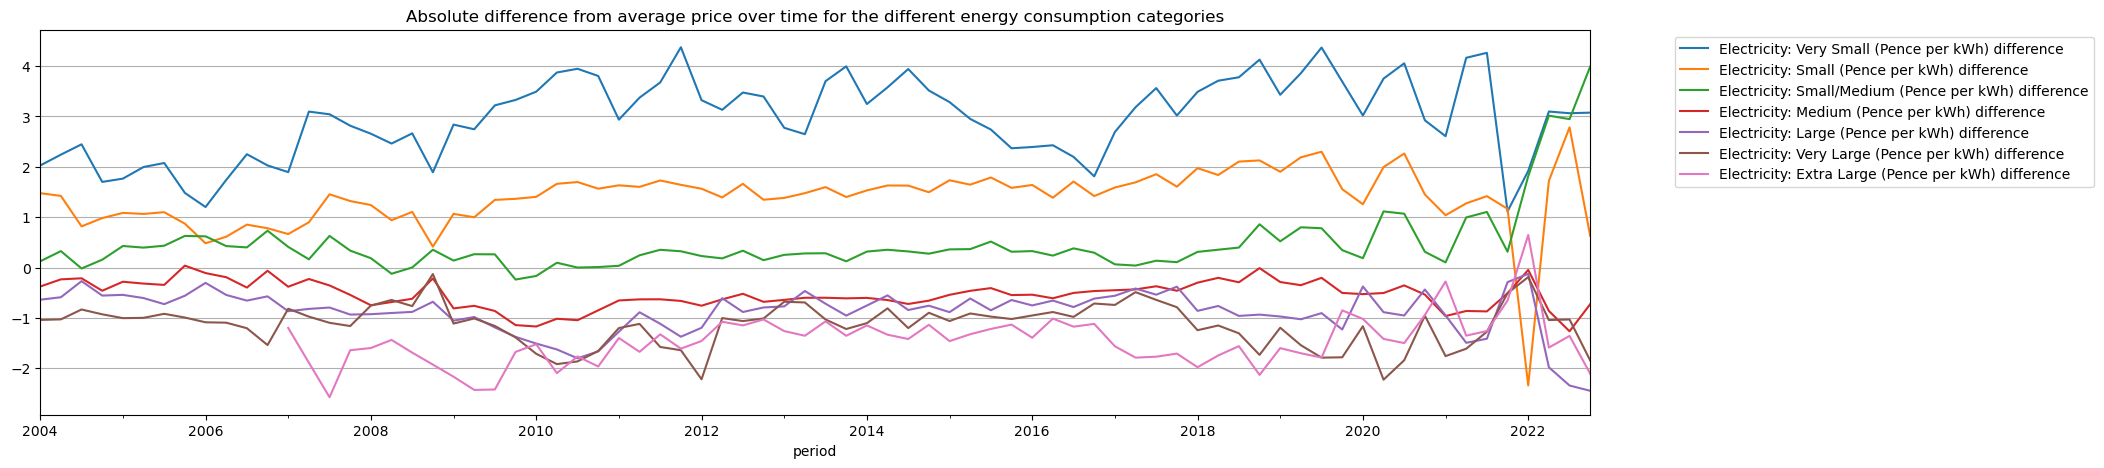

In [16]:
abs_difference.plot(x='period', figsize=(20, 5))

# Move the legend outside of the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# add y gridlines
plt.grid(axis='y')
plt.title('Absolute difference from mean price over time for the different energy consumption categories')
plt.show()

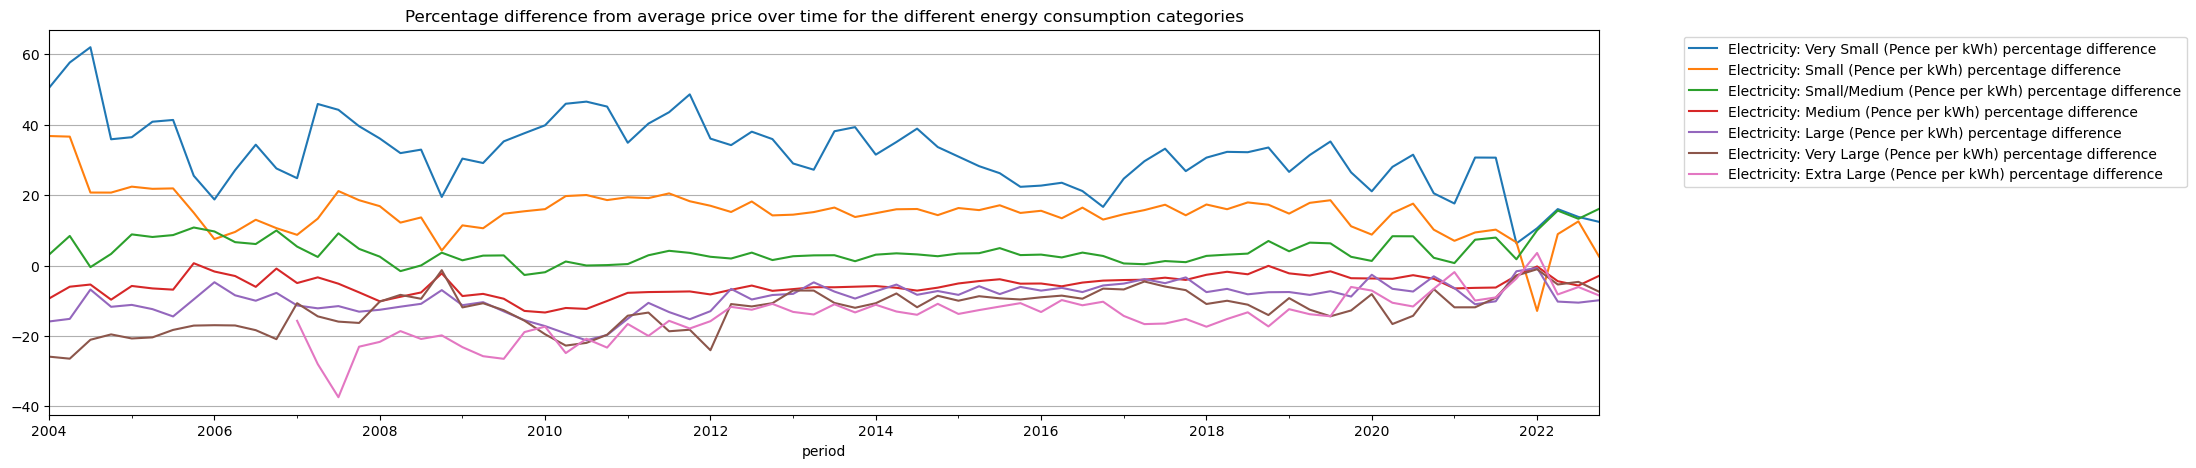

In [17]:
percent_difference.plot(x='period', figsize=(20, 5))

# Move the legend outside of the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# add y gridlines
plt.grid(axis='y')

plt.title('Percentage difference from average price over time for the different energy consumption categories')
plt.show()

### Plot post-start of the energy crisis

plot the recent time period of large energy price inflation. It started around september 2021 due to the reopening of lots of the economy at once. It then worsened due to the invasion of Ukrane by Russia.

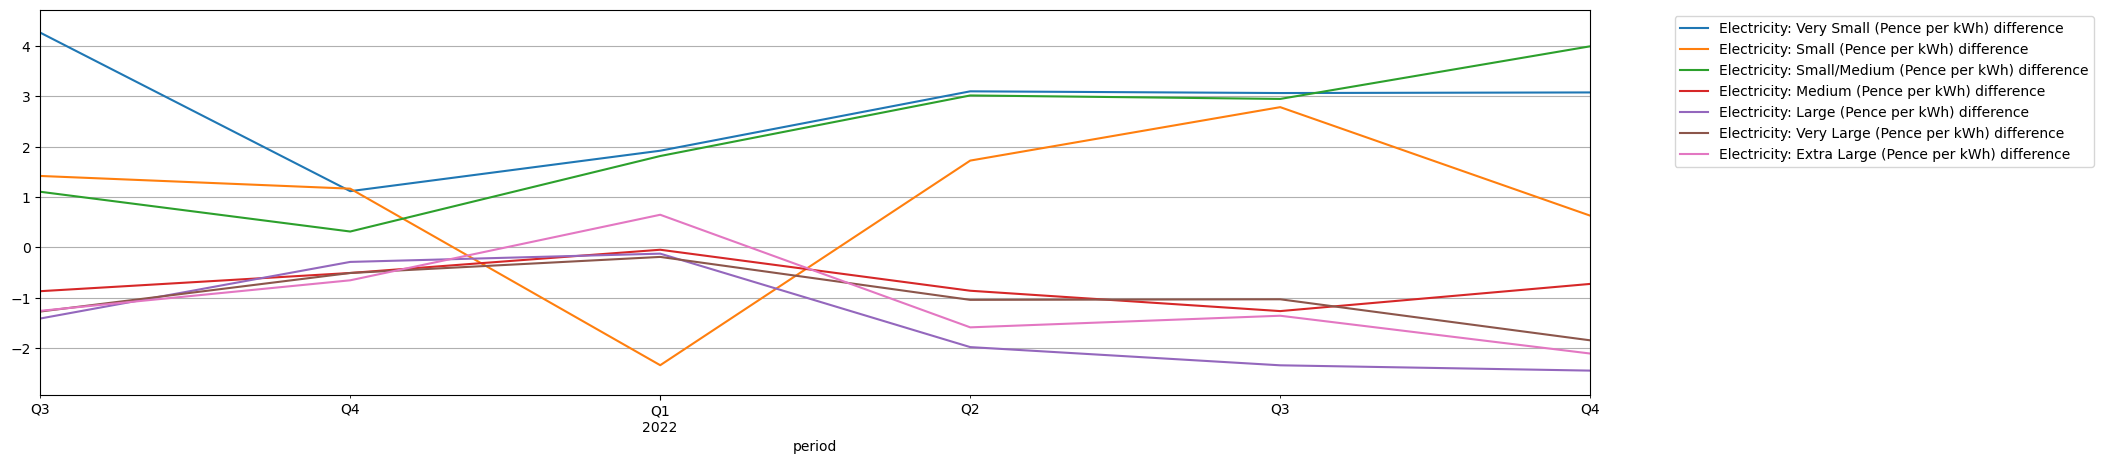

In [18]:

abs_difference.plot(x='period', figsize=(20, 5))

# Set the x-axis limits
plt.xlim(['2021-09-01', '2022-10-01'])

plt.grid(axis='y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


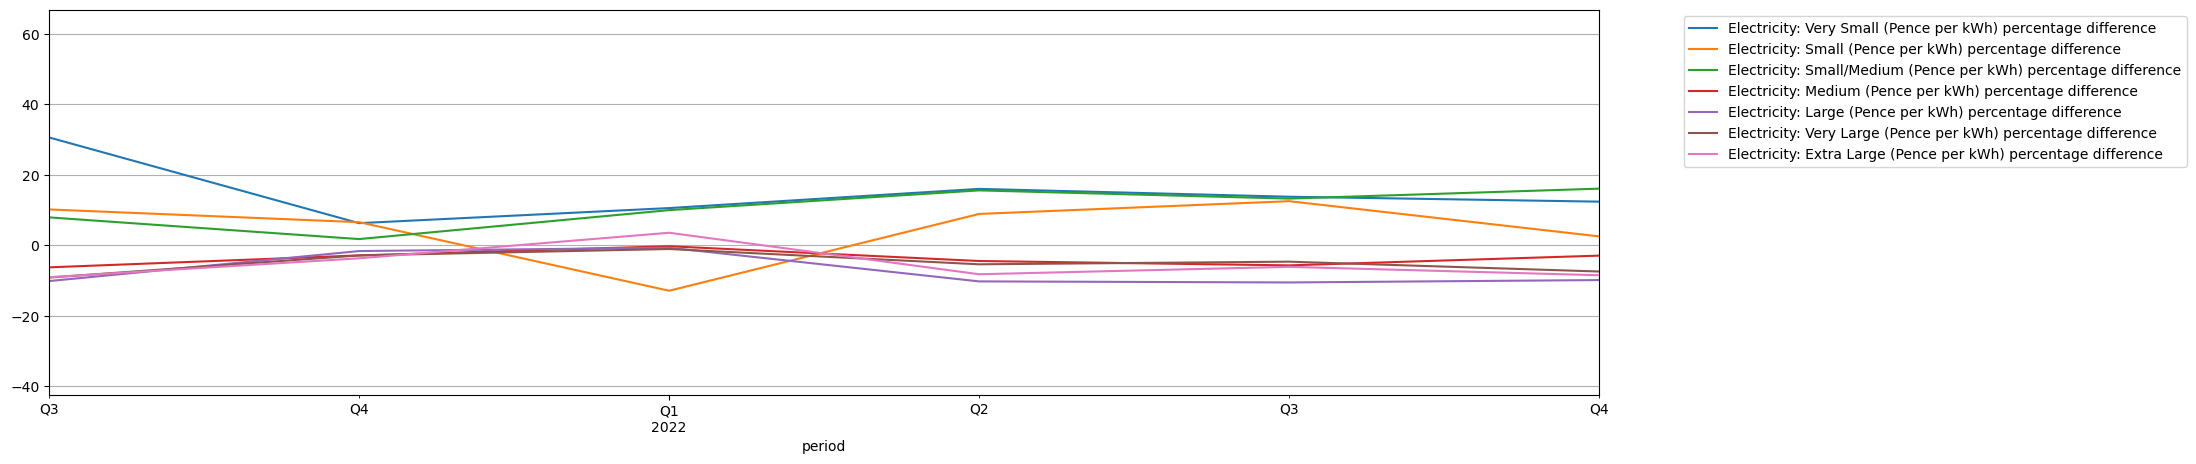

In [19]:
# plot the time recent time period for large energy price inflation (post start of the ukrane war)

percent_difference.plot(x='period', figsize=(20, 5))

# Set the x-axis limits
plt.xlim(['2021-09-01', '2022-10-01'])

plt.grid(axis='y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


### Visualise spread of the differences to the mean for the different energy users

#### Absolute difference

In [20]:
abs_difference.head(1)

,period,Electricity: Very Small (Pence per kWh) difference,Electricity: Small (Pence per kWh) difference,Electricity: Small/Medium (Pence per kWh) difference,Electricity: Medium (Pence per kWh) difference,Electricity: Large (Pence per kWh) difference,Electricity: Very Large (Pence per kWh) difference,Electricity: Extra Large (Pence per kWh) difference
0,2004-01-01,2.0269,1.476762,0.12475,-0.375891,-0.638054,-1.039241,NaN


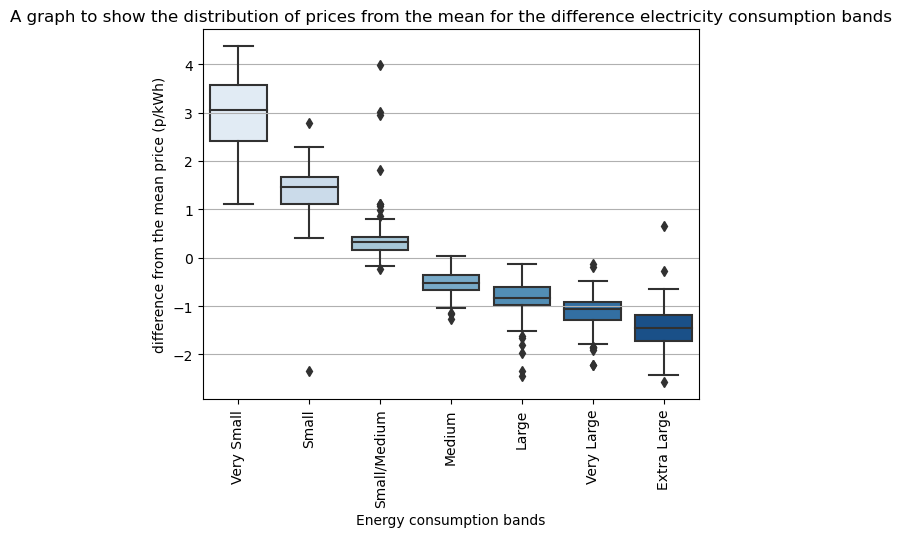

In [21]:
# visualise the spending on each day of the week for the dataset.

# drop the period as we don't need it for the plot
df = abs_difference.drop(['period'], axis=1)

# rename the columns for the plot
df.rename(columns={'Electricity: Very Small (Pence per kWh) difference':'Very Small',
                   'Electricity: Small (Pence per kWh) difference':'Small',
                   'Electricity: Small/Medium (Pence per kWh) difference':'Small/Medium',
                   'Electricity: Medium (Pence per kWh) difference':'Medium',
                   'Electricity: Large (Pence per kWh) difference':'Large',
                   'Electricity: Very Large (Pence per kWh) difference':'Very Large',
                   'Electricity: Extra Large (Pence per kWh) difference':'Extra Large'},
                   inplace = True
)

# melt the df's into long format
df_melted = pd.melt(df)

# create a boxplot for each column
sns.boxplot(data=df_melted, x="variable", y="value", palette='Blues')

# rotate the x labels
plt.xticks(rotation=90)

# add axis labels
plt.xlabel('Energy consumption bands')
plt.ylabel('difference from the mean price (p/kWh)')

plt.title('A graph to show the distribution of prices from the mean for the different electricity consumption bands')
plt.grid(axis='y')

#### Percentage difference

In [22]:
percent_difference.head(1)

,period,Electricity: Very Small (Pence per kWh) percentage difference,Electricity: Small (Pence per kWh) percentage difference,Electricity: Small/Medium (Pence per kWh) percentage difference,Electricity: Medium (Pence per kWh) percentage difference,Electricity: Large (Pence per kWh) percentage difference,Electricity: Very Large (Pence per kWh) percentage difference,Electricity: Extra Large (Pence per kWh) percentage difference
0,2004-01-01,50.4832,36.78112,3.107092,-9.362169,-15.891758,-25.883951,NaN


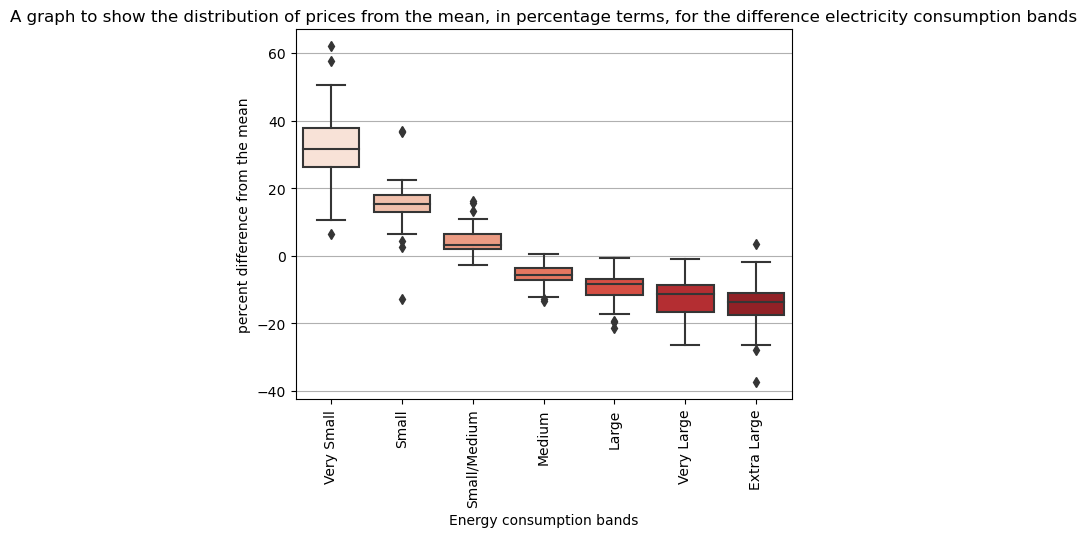

In [23]:
# drop the period as we don't need it for the plot
df = percent_difference.drop(['period'], axis=1)

# rename the columns for the plot
df.rename(columns={'Electricity: Very Small (Pence per kWh) percentage difference':'Very Small',
                   'Electricity: Small (Pence per kWh) percentage difference':'Small',
                   'Electricity: Small/Medium (Pence per kWh) percentage difference':'Small/Medium',
                   'Electricity: Medium (Pence per kWh) percentage difference':'Medium',
                   'Electricity: Large (Pence per kWh) percentage difference':'Large',
                   'Electricity: Very Large (Pence per kWh) percentage difference':'Very Large',
                   'Electricity: Extra Large (Pence per kWh) percentage difference':'Extra Large'},
                   inplace = True
)

# melt the df's into long format
df_melted = pd.melt(df)

# create a boxplot for each column
sns.boxplot(data=df_melted, x="variable", y="value", palette='Reds')

# rotate the x labels
plt.xticks(rotation=90)

# add axis labels
plt.xlabel('Energy consumption bands')
plt.ylabel('percent difference from the mean')

plt.title('A graph to show the distribution of prices from the average, in percentage terms, for the difference electricity consumption bands')
plt.grid(axis='y')

In [53]:
# get values for the box plot

df_melted.groupby(['variable', 'value']).describe()

ValueError: Cannot describe a DataFrame without columns

## Gas - price difference depending on consumption band

Do the same analysis for gas prices.

In [24]:
g_column_list = ['Gas: Very Small (Pence per kWh)', 
                 'Gas: Small (Pence per kWh)', 
                 'Gas: Medium (Pence per kWh)',
                 'Gas: Large (Pence per kWh)',
                 'Gas: Very Large (Pence per kWh)'
]

In [25]:
gprice.head()

,period,Gas: Very Small (Pence per kWh),Gas: Small (Pence per kWh),Gas: Medium (Pence per kWh),Gas: Large (Pence per kWh),Gas: Very Large (Pence per kWh),Gas: Average (Pence per kWh)
0,2004-01-01,1.613505,1.406366,1.163652,1.040894,0.877579,1.251000
1,2004-04-01,1.466271,1.304053,1.262996,1.034469,1.087342,1.225000
2,2004-07-01,1.688511,1.513226,1.214925,0.906780,0.984872,1.209000
3,2004-10-01,1.485573,1.394492,1.339390,1.200072,1.036643,1.305574
4,2005-01-01,1.834352,1.725252,1.596385,1.437451,1.287418,1.580000


In [26]:
# create a new column in the dataframe which is the difference between the largest and smallest consumers costs.
gprice['Gas difference'] = gprice['Gas: Very Small (Pence per kWh)'] - gprice['Gas: Very Large (Pence per kWh)']

# create a new column to calculate the percentage difference
gprice['Gas percentage difference'] = (gprice['Gas difference'] / gprice['Gas: Very Large (Pence per kWh)']) * 100

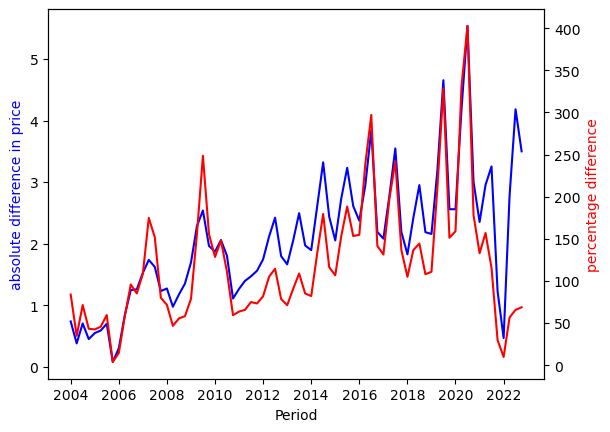

In [27]:
# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the first series of data on the first y-axis
ax1.plot(gprice['period'], gprice['Gas difference'], 'b-')
ax1.set_xlabel('Period')
ax1.set_ylabel('absolute difference in price', color='b')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(gprice['period'], gprice['Gas percentage difference'], 'r-')
ax2.set_ylabel('percentage difference', color='r')

plt.show()

### I now want to create a plot showing these differences between all the different energy groups to the average price

In [28]:
gprice.head(1)

,period,Gas: Very Small (Pence per kWh),Gas: Small (Pence per kWh),Gas: Medium (Pence per kWh),Gas: Large (Pence per kWh),Gas: Very Large (Pence per kWh),Gas: Average (Pence per kWh),Gas difference,Gas percentage difference
0,2004-01-01,1.613505,1.406366,1.163652,1.040894,0.877579,1.251,0.735926,83.858599


In [29]:
# create a new dataframe to hold the absoute difference
abs_difference_gas = pd.DataFrame()
percent_difference_gas = pd.DataFrame()

# add the period into these dataframes
abs_difference_gas['period'] = gprice['period'].copy()
percent_difference_gas['period'] = gprice['period'].copy()

# Iterate through the columns and find the difference from the mean in absolute terms.
for col in g_column_list:
    abs_difference_gas[f'{col} difference'] = gprice[col] - gprice['Gas: Average (Pence per kWh)']
    percent_difference_gas[f'{col} percentage difference'] = (abs_difference_gas[f'{col} difference'] / gprice['Gas: Average (Pence per kWh)']) * 100
   

In [30]:
percent_difference_gas.head()

,period,Gas: Very Small (Pence per kWh) percentage difference,Gas: Small (Pence per kWh) percentage difference,Gas: Medium (Pence per kWh) percentage difference,Gas: Large (Pence per kWh) percentage difference,Gas: Very Large (Pence per kWh) percentage difference
0,2004-01-01,28.977213,12.419367,-6.982223,-16.795077,-29.849779
1,2004-04-01,19.695610,6.453306,3.101676,-15.553512,-11.237380
2,2004-07-01,39.661767,25.163415,0.490114,-24.997509,-18.538310
3,2004-10-01,13.786956,6.810661,2.590161,-8.080857,-20.598710
4,2005-01-01,16.098213,9.193164,1.037020,-9.022085,-18.517875


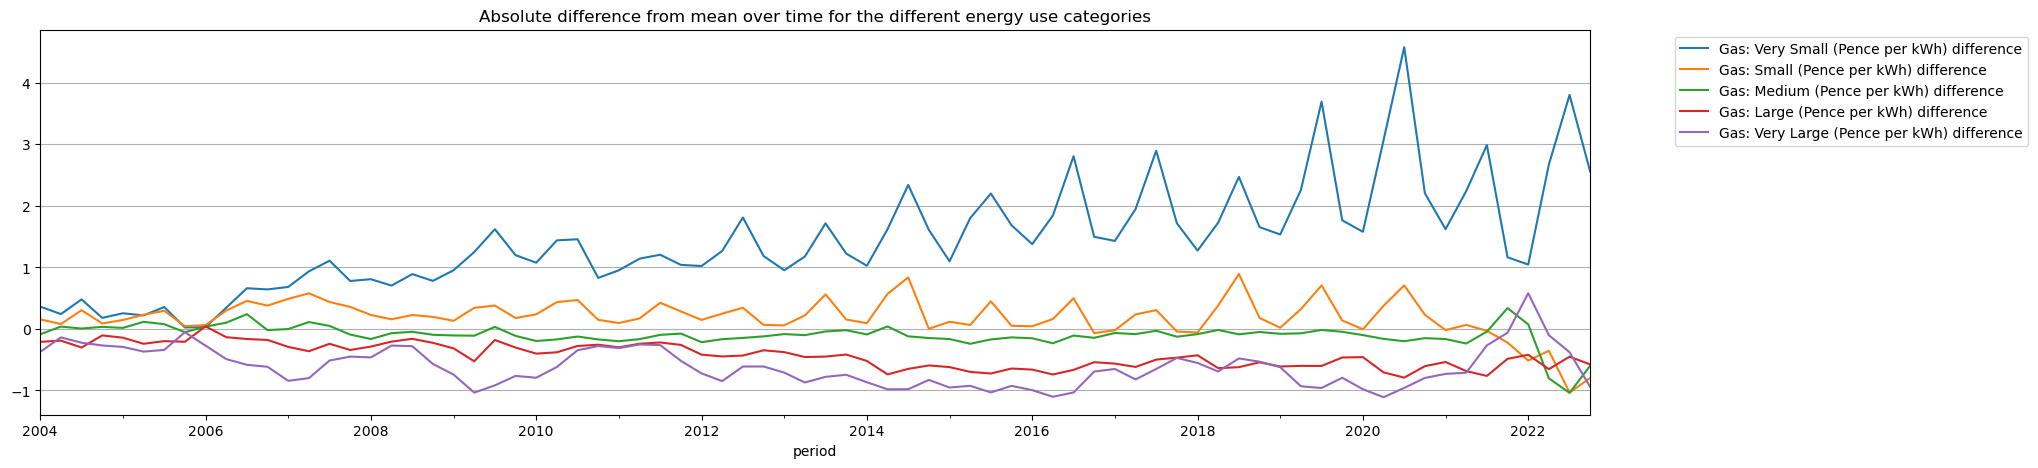

In [31]:
abs_difference_gas.plot(x='period', figsize=(20, 5))

# Move the legend outside of the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# add y gridlines
plt.grid(axis='y')
plt.title('Absolute difference from mean over time for the different energy consumption bands')
plt.show()

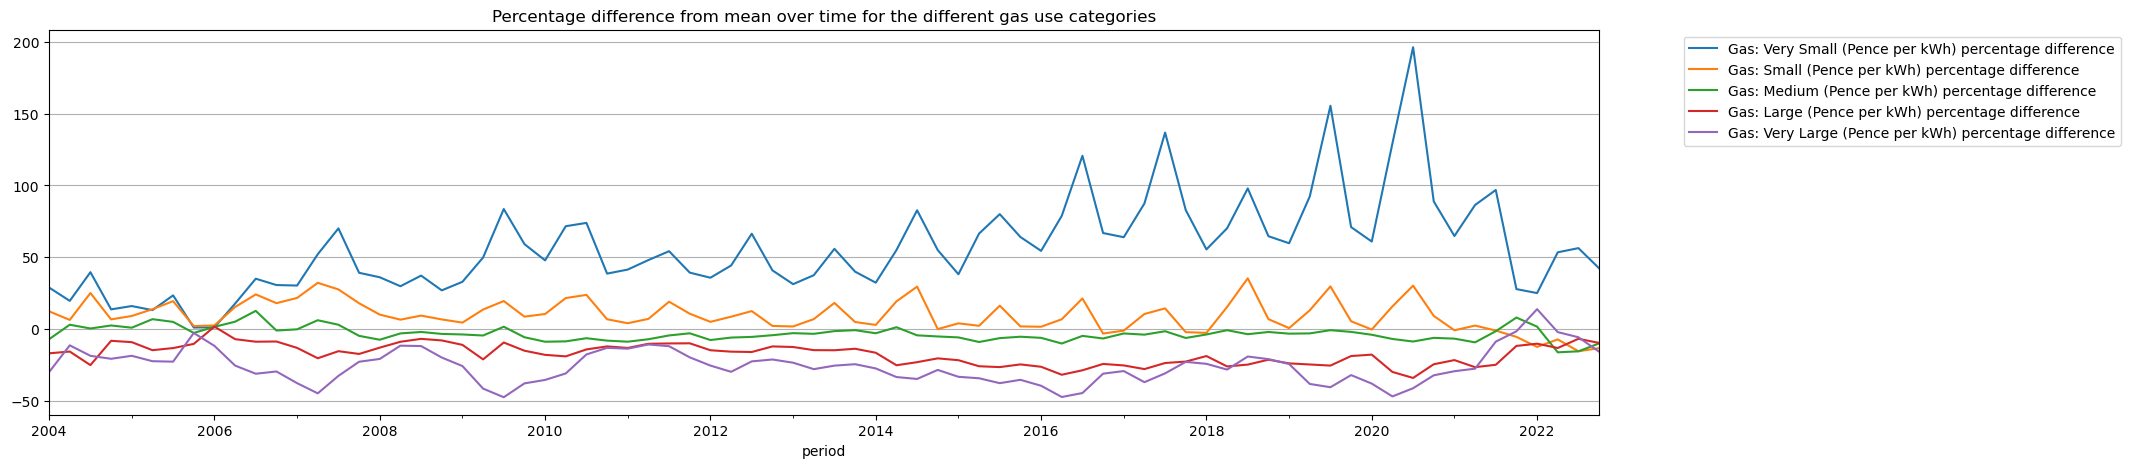

In [32]:
percent_difference_gas.plot(x='period', figsize=(20, 5))

# Move the legend outside of the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# add y gridlines
plt.grid(axis='y')

plt.title('Percentage difference from the mean over time for the different gas consumption bands')
plt.show()

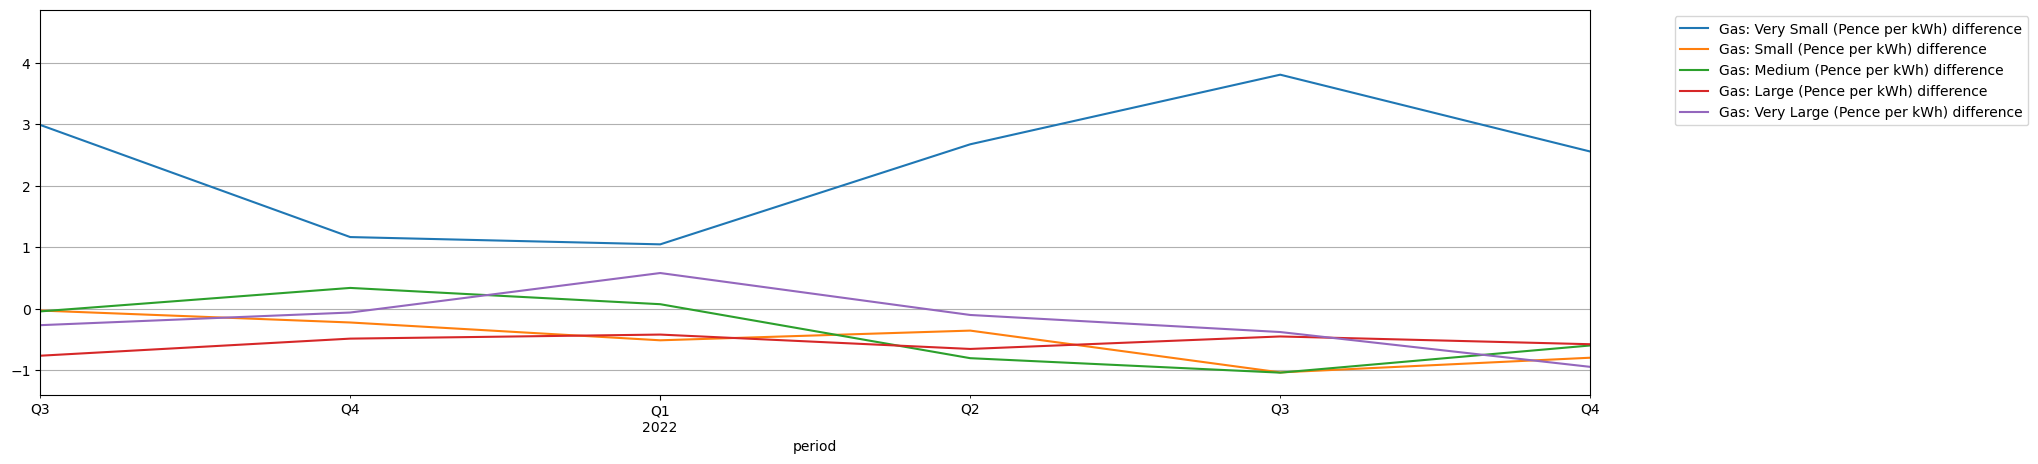

In [33]:
# plot the time recent time period or large energy price inflation (post start of the ukrane war)

abs_difference_gas.plot(x='period', figsize=(20, 5))

# Set the x-axis limits
plt.xlim(['2021-09-01', '2022-10-01'])

plt.grid(axis='y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


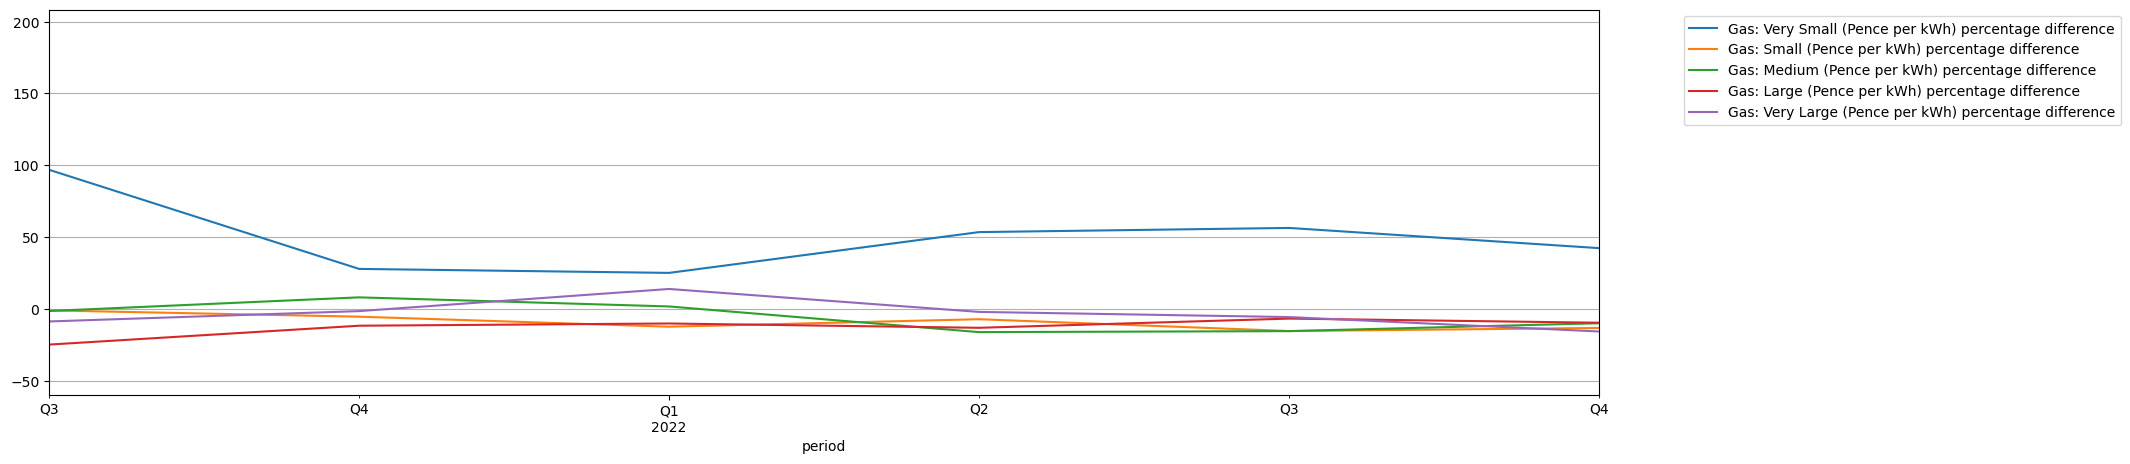

In [34]:
# plot the time recent time period for large energy price inflation (post start of the ukrane war)

percent_difference_gas.plot(x='period', figsize=(20, 5))

# Set the x-axis limits
plt.xlim(['2021-09-01', '2022-10-01'])

plt.grid(axis='y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


### Visualise spread of the differences to the mean for the different energy users

#### Absoule difference

In [35]:
abs_difference_gas.head(1)

,period,Gas: Very Small (Pence per kWh) difference,Gas: Small (Pence per kWh) difference,Gas: Medium (Pence per kWh) difference,Gas: Large (Pence per kWh) difference,Gas: Very Large (Pence per kWh) difference
0,2004-01-01,0.362505,0.155366,-0.087348,-0.210106,-0.373421


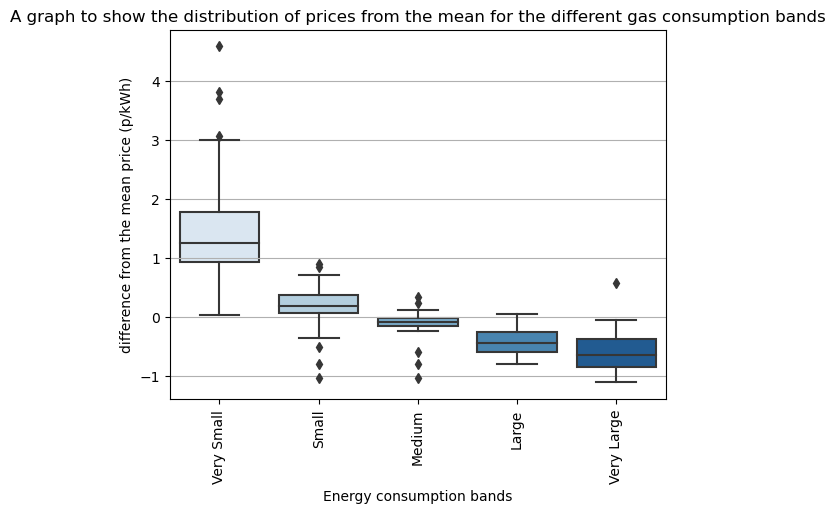

In [36]:
# visualise the spending on each day of the week for the dataset.

# drop the period as we don't need it for the plot
df = abs_difference_gas.drop(['period'], axis=1)

# rename the columns for the plot
df.rename(columns={'Gas: Very Small (Pence per kWh) difference':'Very Small',
                   'Gas: Small (Pence per kWh) difference':'Small',
                   'Gas: Small/Medium (Pence per kWh) difference':'Small/Medium',
                   'Gas: Medium (Pence per kWh) difference':'Medium',
                   'Gas: Large (Pence per kWh) difference':'Large',
                   'Gas: Very Large (Pence per kWh) difference':'Very Large'},
                   inplace = True
)

# melt the df's into long format
df_melted = pd.melt(df)

# create a boxplot for each column
sns.boxplot(data=df_melted, x="variable", y="value", palette='Blues')

# rotate the x labels
plt.xticks(rotation=90)

# add axis labels
plt.xlabel('Energy consumption bands')
plt.ylabel('difference from the mean price (p/kWh)')

plt.title('A graph to show the distribution of prices from the mean for the different gas consumption bands')
plt.grid(axis='y')

#### Percentage difference

In [37]:
percent_difference_gas.head(1)

,period,Gas: Very Small (Pence per kWh) percentage difference,Gas: Small (Pence per kWh) percentage difference,Gas: Medium (Pence per kWh) percentage difference,Gas: Large (Pence per kWh) percentage difference,Gas: Very Large (Pence per kWh) percentage difference
0,2004-01-01,28.977213,12.419367,-6.982223,-16.795077,-29.849779


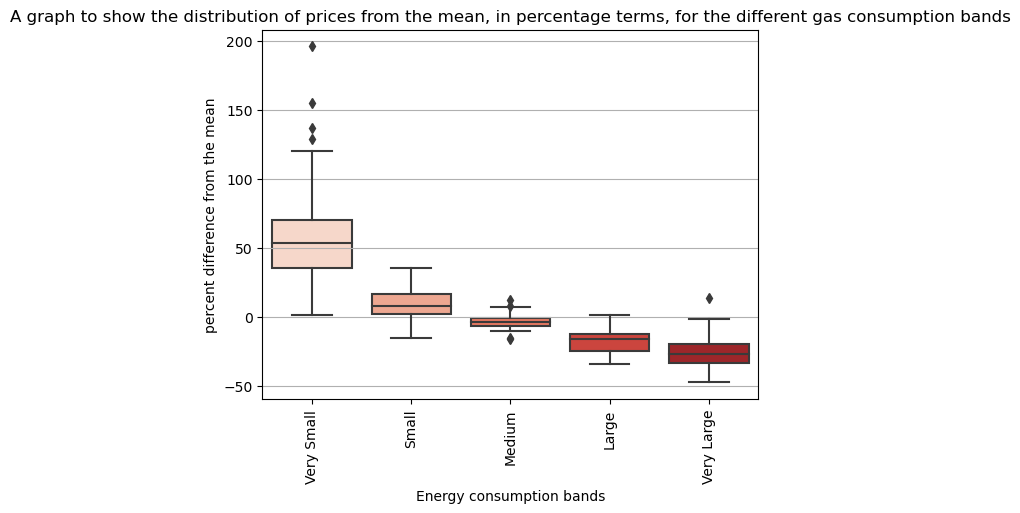

In [38]:
# drop the period as we don't need it for the plot
df = percent_difference_gas.drop(['period'], axis=1)

# rename the columns for the plot
df.rename(columns={'Gas: Very Small (Pence per kWh) percentage difference':'Very Small',
                   'Gas: Small (Pence per kWh) percentage difference':'Small',
                   'Gas: Small/Medium (Pence per kWh) percentage difference':'Small/Medium',
                   'Gas: Medium (Pence per kWh) percentage difference':'Medium',
                   'Gas: Large (Pence per kWh) percentage difference':'Large',
                   'Gas: Very Large (Pence per kWh) percentage difference':'Very Large'},
                   inplace = True
)

# melt the df's into long format
df_melted = pd.melt(df)

# create a boxplot for each column
sns.boxplot(data=df_melted, x="variable", y="value", palette='Reds')

# rotate the x labels
plt.xticks(rotation=90)

# add axis labels
plt.xlabel('Energy consumption bands')
plt.ylabel('percent difference from the mean')

plt.title('A graph to show the distribution of prices from the mean, in percentage terms, for the different gas consumption bands')
plt.grid(axis='y')

# I want to produce these boxplots for before and after the start of the energy crisis to see what affect that has had

## I want to get the code below running as a loop through the dataframes.

Can't currently get that working. Possibly combining the data into one dataframe would work better. Did it all manually and separately for now as I was short on time and it worked.

In [39]:
# first grab the electricity data and rename the columns.

abs_difference_elec_date_index = abs_difference.copy()
percent_difference_elec_date_index = percent_difference.copy()
        
# rename the columns
abs_difference_elec_date_index.rename(columns={'Electricity: Very Small (Pence per kWh) difference':'Very Small',
                                                'Electricity: Small (Pence per kWh) difference':'Small',
                                                'Electricity: Small/Medium (Pence per kWh) difference':'Small/Medium',
                                                'Electricity: Medium (Pence per kWh) difference':'Medium',
                                                'Electricity: Large (Pence per kWh) difference':'Large',
                                                'Electricity: Very Large (Pence per kWh) difference':'Very Large',
                                                'Electricity: Extra Large (Pence per kWh) difference':'Extra Large'},
                                                inplace = True
                                        )

# rename the columns
percent_difference_elec_date_index.rename(columns={'Electricity: Very Small (Pence per kWh) percentage difference':'Very Small',
                                                  'Electricity: Small (Pence per kWh) percentage difference':'Small',
                                                  'Electricity: Small/Medium (Pence per kWh) percentage difference':'Small/Medium',
                                                  'Electricity: Medium (Pence per kWh) percentage difference':'Medium',
                                                  'Electricity: Large (Pence per kWh) percentage difference':'Large',
                                                  'Electricity: Very Large (Pence per kWh) percentage difference':'Very Large',
                                                  'Electricity: Extra Large (Pence per kWh) percentage difference':'Extra Large'},
                                                inplace = True
                                         )

In [40]:
percent_difference_elec_date_index.tail()

,period,Very Small,Small,Small/Medium,Medium,Large,Very Large,Extra Large
71,2021-10-01,6.292920,6.575702,1.775115,-2.866794,-1.628245,-2.869004,-3.687588
72,2022-01-01,10.579895,-12.898141,9.999378,-0.259799,-0.687256,-1.044988,3.569951
73,2022-04-01,16.029330,8.914518,15.605251,-4.453700,-10.244335,-5.391632,-8.214982
74,2022-07-01,13.799065,12.536750,13.272518,-5.697140,-10.544597,-4.640514,-6.112188
75,2022-10-01,12.404023,2.538449,16.098424,-2.925393,-9.866829,-7.442053,-8.499430


In [41]:
# perform the same action on the gas dataframes

abs_difference_gas_date_index = abs_difference_gas.copy()
percent_difference_gas_date_index = percent_difference_gas.copy()

# rename the columns for the plot
abs_difference_gas_date_index.rename(columns={'Gas: Very Small (Pence per kWh) difference':'Very Small',
                                                'Gas: Small (Pence per kWh) difference':'Small',
                                                'Gas: Small/Medium (Pence per kWh) difference':'Small/Medium',
                                                'Gas: Medium (Pence per kWh) difference':'Medium',
                                                'Gas: Large (Pence per kWh) difference':'Large',
                                                'Gas: Very Large (Pence per kWh) difference':'Very Large'},
                                                inplace = True
                                )     
# rename the columns for the plot
percent_difference_gas_date_index.rename(columns={'Gas: Very Small (Pence per kWh) percentage difference':'Very Small',
                                                'Gas: Small (Pence per kWh) percentage difference':'Small',
                                                'Gas: Small/Medium (Pence per kWh) percentage difference':'Small/Medium',
                                                'Gas: Medium (Pence per kWh) percentage difference':'Medium',
                                                'Gas: Large (Pence per kWh) percentage difference':'Large',
                                                'Gas: Very Large (Pence per kWh) percentage difference':'Very Large'},
                                                inplace = True
                                        )               
                        

In [42]:
percent_difference_gas_date_index.head()

,period,Very Small,Small,Medium,Large,Very Large
0,2004-01-01,28.977213,12.419367,-6.982223,-16.795077,-29.849779
1,2004-04-01,19.695610,6.453306,3.101676,-15.553512,-11.237380
2,2004-07-01,39.661767,25.163415,0.490114,-24.997509,-18.538310
3,2004-10-01,13.786956,6.810661,2.590161,-8.080857,-20.598710
4,2005-01-01,16.098213,9.193164,1.037020,-9.022085,-18.517875


In [43]:
# set the period as the index
abs_difference_elec_date_index = abs_difference_elec_date_index.set_index('period')

abs_difference_elec_date_index.sort_index()

abs_difference_elec_date_index.head()

,Very Small,Small,Small/Medium,Medium,Large,Very Large,Extra Large
period,,,,,,,
2004-01-01,2.026900,1.476762,0.124750,-0.375891,-0.638054,-1.039241,NaN
2004-04-01,2.241515,1.423131,0.326574,-0.233895,-0.589021,-1.028484,NaN
2004-07-01,2.446726,0.817896,-0.017998,-0.213040,-0.269200,-0.832062,NaN
2004-10-01,1.700553,0.982362,0.156325,-0.459812,-0.555805,-0.927743,NaN
2005-01-01,1.765770,1.085425,0.428539,-0.281212,-0.541652,-1.003862,NaN


In [44]:
# set the period as the index
percent_difference_elec_date_index = percent_difference_elec_date_index.set_index('period')

percent_difference_elec_date_index.sort_index()

percent_difference_elec_date_index.head()

,Very Small,Small,Small/Medium,Medium,Large,Very Large,Extra Large
period,,,,,,,
2004-01-01,50.483200,36.781120,3.107092,-9.362169,-15.891758,-25.883951,NaN
2004-04-01,57.666976,36.612591,8.401694,-6.017376,-15.153612,-26.459593,NaN
2004-07-01,62.005232,20.727227,-0.456099,-5.398882,-6.822103,-21.086218,NaN
2004-10-01,35.861510,20.716203,3.296611,-9.696594,-11.720900,-19.564387,NaN
2005-01-01,36.445208,22.402999,8.844968,-5.804164,-11.179599,-20.719550,NaN


In [45]:
# set the period as the index
abs_difference_gas_date_index = abs_difference_gas_date_index.set_index('period')

abs_difference_gas_date_index.sort_index()

abs_difference_gas_date_index.head()

,Very Small,Small,Medium,Large,Very Large
period,,,,,
2004-01-01,0.362505,0.155366,-0.087348,-0.210106,-0.373421
2004-04-01,0.241271,0.079053,0.037996,-0.190531,-0.137658
2004-07-01,0.479511,0.304226,0.005925,-0.302220,-0.224128
2004-10-01,0.179999,0.088918,0.033816,-0.105502,-0.268931
2005-01-01,0.254352,0.145252,0.016385,-0.142549,-0.292582


In [46]:
# set the period as the index
percent_difference_gas_date_index = percent_difference_gas_date_index.set_index('period')

percent_difference_gas_date_index.sort_index()

percent_difference_gas_date_index.head()

,Very Small,Small,Medium,Large,Very Large
period,,,,,
2004-01-01,28.977213,12.419367,-6.982223,-16.795077,-29.849779
2004-04-01,19.695610,6.453306,3.101676,-15.553512,-11.237380
2004-07-01,39.661767,25.163415,0.490114,-24.997509,-18.538310
2004-10-01,13.786956,6.810661,2.590161,-8.080857,-20.598710
2005-01-01,16.098213,9.193164,1.037020,-9.022085,-18.517875


In [47]:
# trying to do the above by looping through a list of the dataframes but can't get it working yet.

# # create a list of the dataframes so we can loop through them
# df_list = [abs_difference_elec_date_index, percent_difference_elec_date_index, abs_difference_gas_date_index, percent_difference_gas_date_index]

# # set the index to date for all these dataframes so we can split them on a certain date.
# # loop over the dataframes and change the index to the 'period' column

# for i, df in enumerate(df_list):
#     # set the period as the index
#     df_list[i] = df_list[i].set_index('period')

#     # now drop the period column as no longer needed
#     df_list[i].drop(columns=['period'], inplace=True)
#     df_list[i].sort_index()

# percent_difference_gas_date_index.head()

## Plot the data pre and post the start of the energy crisis

In [48]:
# split the dataframe on the start of the energy crisis in the UK (september 2021). It is quarterly data so it actually splits between july and october.
split_date = '2021-09-01'


abs_difference_elec_pre = abs_difference_elec_date_index[:split_date]
abs_difference_elec_post = abs_difference_elec_date_index[split_date:]

abs_difference_gas_pre = abs_difference_gas_date_index[:split_date]
abs_difference_gas_post = abs_difference_gas_date_index[split_date:]

percent_difference_elec_pre = percent_difference_elec_date_index[:split_date]
percent_difference_elec_post = percent_difference_elec_date_index[split_date:]

percent_difference_gas_pre = percent_difference_gas_date_index[:split_date]
percent_difference_gas_post = percent_difference_gas_date_index[split_date:]

### electricity percentage difference

In [49]:
# melt the df's into long format
df_melted_pre = pd.melt(percent_difference_elec_pre)
df_melted_post = pd.melt(percent_difference_elec_post)

# add pre and post labels to each dataframe
df_melted_pre['pre or post energy crisis'] = 'pre energy crisis'
df_melted_post['pre or post energy crisis'] = 'post energy crisis'

# join the dataframes
p_difference_elec = pd.concat([df_melted_pre, df_melted_post], axis=0)

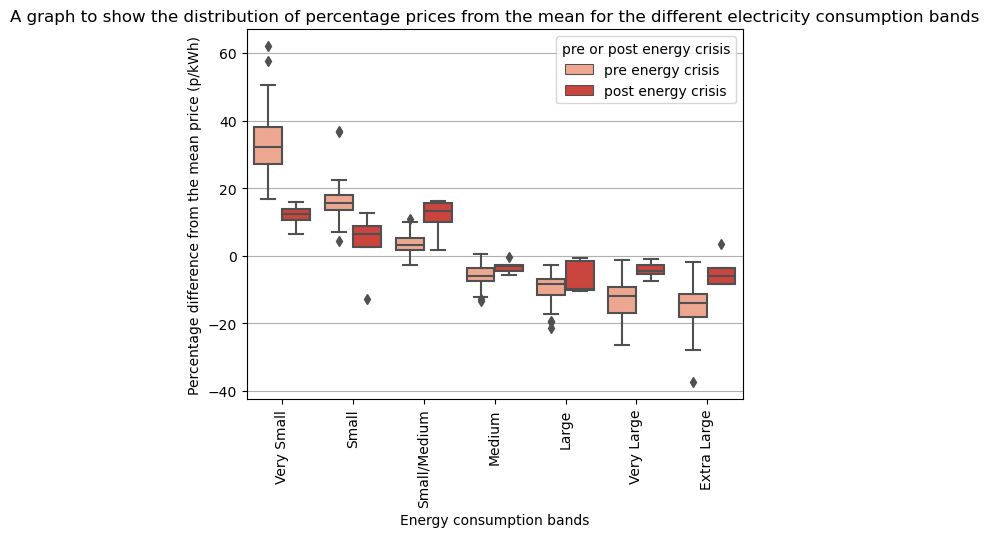

In [50]:
# create a boxplot for each column
sns.boxplot(data=p_difference_elec, x="variable", y="value", hue='pre or post energy crisis', palette='Reds')

# rotate the x labels
plt.xticks(rotation=90)

# add axis labels
plt.xlabel('Energy consumption bands')
plt.ylabel('Percentage difference from the mean price (p/kWh)')

plt.title('A graph to show the distribution of percentage prices from the mean for the different electricity consumption bands')
plt.grid(axis='y')

### gas percentage difference

In [51]:
# melt the df's into long format
df_melted_pre = pd.melt(percent_difference_gas_pre)
df_melted_post = pd.melt(percent_difference_gas_post)

# add pre and post labels to each dataframe
df_melted_pre['pre or post energy crisis'] = 'pre energy crisis'
df_melted_post['pre or post energy crisis'] = 'post energy crisis'

# join the dataframes
p_difference_gas = pd.concat([df_melted_pre, df_melted_post], axis=0)

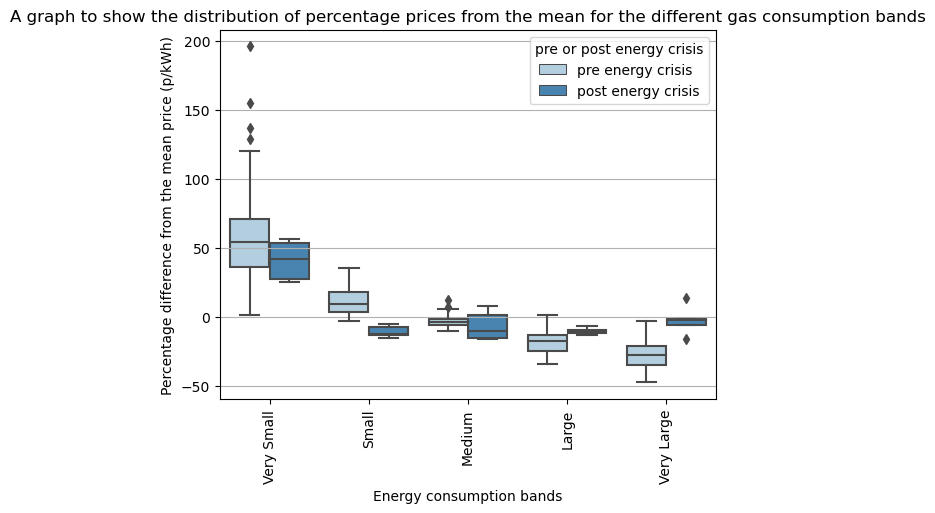

In [52]:
# create a boxplot for each column
sns.boxplot(data=p_difference_gas, x="variable", y="value", hue='pre or post energy crisis', palette='Blues')

# rotate the x labels
plt.xticks(rotation=90)

# add axis labels
plt.xlabel('Energy consumption bands')
plt.ylabel('Percentage difference from the mean price (p/kWh)')

plt.title('A graph to show the distribution of percentage prices from the mean for the different gas consumption bands')
plt.grid(axis='y')